# 实验4 图像频域滤波处理

## 4-1：利用傅立叶变换实现图像的空域和频域的变换

实验要求：
1. 空域至频域图像的变换：原点、移中、移中后的原点；
2. 频域至空域图像的变换：单波形的频域图像赋值（对称性、移中），各种波形组合的空域图像；
3. 空域图像与频域图像的互换。

导入必要的库

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

加载图像

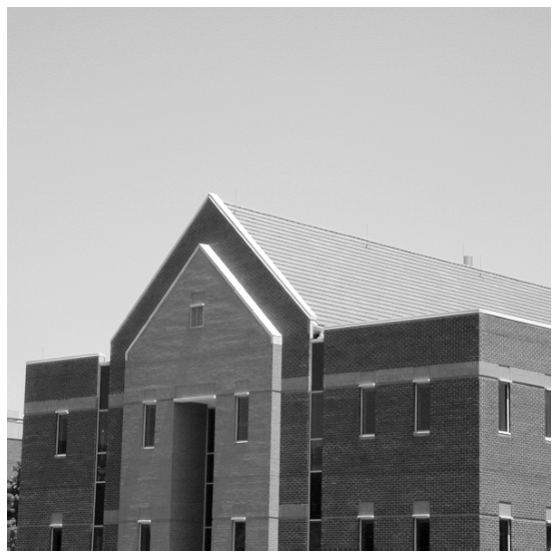

In [2]:
image = cv2.imread("imgs/Lab4/building-600by600.tif", cv2.IMREAD_GRAYSCALE)
plt.figure(figsize=(10, 10))
plt.imshow(image, cmap="gray")
plt.axis("off")
plt.show()

空域至频域

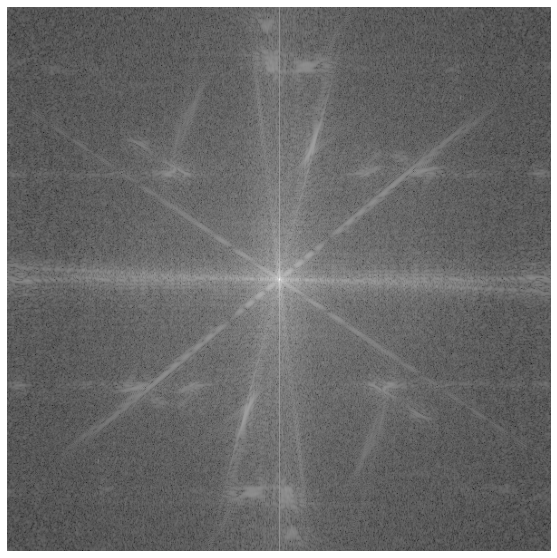

In [3]:
dft = cv2.dft(np.float32(image), flags=cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)
magnitude_spectrum = np.log(cv2.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1]))

plt.figure(figsize=(10, 10))
plt.imshow(magnitude_spectrum, cmap="gray")
plt.axis("off")
plt.show()

逆傅里叶变换，频域至空域

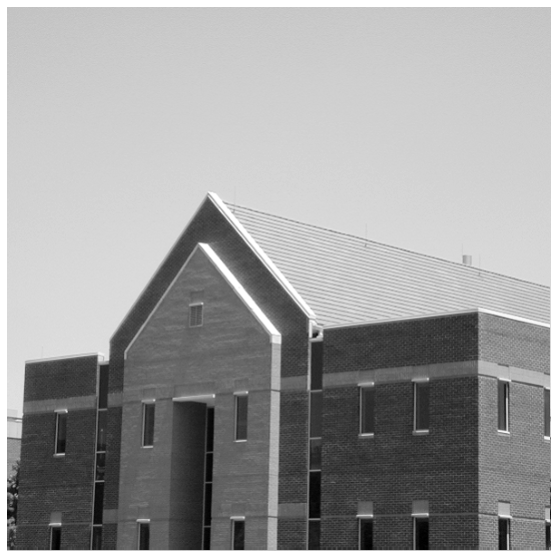

In [4]:
idft = cv2.idft(dft_shift)
idft = cv2.magnitude(idft[:, :, 0], idft[:, :, 1])
idft = cv2.flip(idft, 0)
idft = cv2.flip(idft, 1)

plt.figure(figsize=(10, 10))
plt.imshow(idft, cmap="gray")
plt.axis("off")
plt.show()

单波形的图像

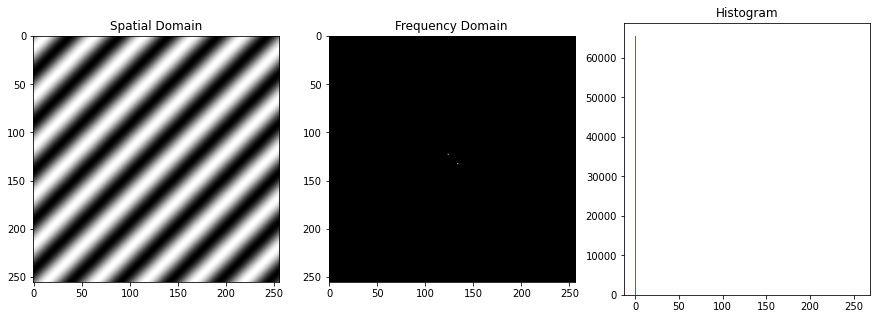

In [5]:
# Generate a sine wave image
height = 256
width = 256
frequency = 10
amplitude = 100

x = np.arange(width)
y = np.arange(height)
xx, yy = np.meshgrid(x, y)
image = amplitude * np.sin(2 * np.pi * frequency * (xx + yy) / (width + height))

# Compute the Fourier transform
dft = cv2.dft(np.float32(image), flags=cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)
magnitude_spectrum = np.log(cv2.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1]) + 1)

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(image, cmap="gray")
plt.title("Spatial Domain")

# Display the frequency domain image
plt.subplot(1, 3, 2)
plt.imshow(magnitude_spectrum, cmap="gray")
plt.title("Frequency Domain")

# Display the histogram of the frequency domain image
plt.subplot(1, 3, 3)
plt.hist(magnitude_spectrum.flatten(), 256, [0, 256])
plt.title("Histogram")
plt.show()

## 4-2：实现图像的频域滤波处理

实验要求：
1. 使用3×3的Sobel核，滤波600×600的house图像；
2. 使用Laplacian高通滤波器，在频域中锐化moon图像。

加载图像

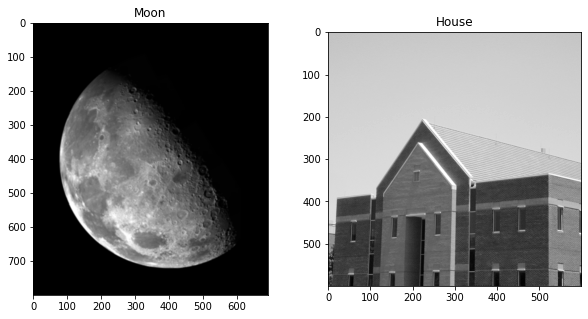

In [6]:
moon = cv2.imread("imgs/Lab4/blurry-moon.tif", cv2.IMREAD_GRAYSCALE)
house = cv2.imread("imgs/Lab4/building-600by600.tif", cv2.IMREAD_GRAYSCALE)

# Display the original images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(moon, cmap="gray")
plt.title("Moon")

plt.subplot(1, 2, 2)
plt.imshow(house, cmap="gray")
plt.title("House")
plt.show()

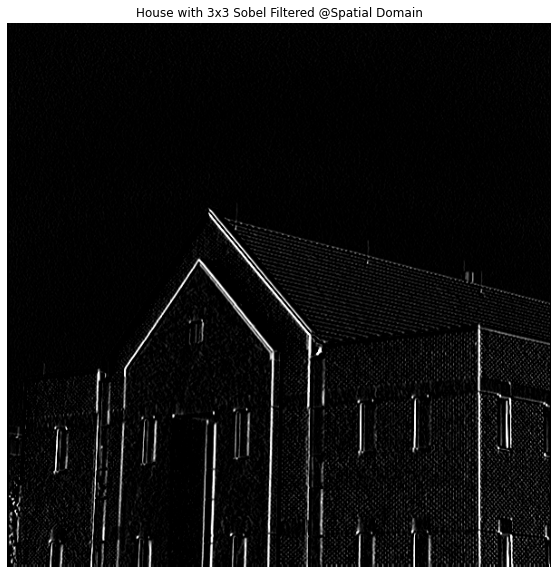

In [7]:
# Define the Sobel kernel
sobel_kernel = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])

# Apply the Sobel filter to the "house" image
filtered_image = cv2.filter2D(house, -1, sobel_kernel)

# Display the filtered image
plt.figure(figsize=(10, 10))
plt.imshow(filtered_image, cmap="gray")
plt.title("House with 3x3 Sobel Filtered @Spatial Domain")
plt.axis("off")
plt.show()


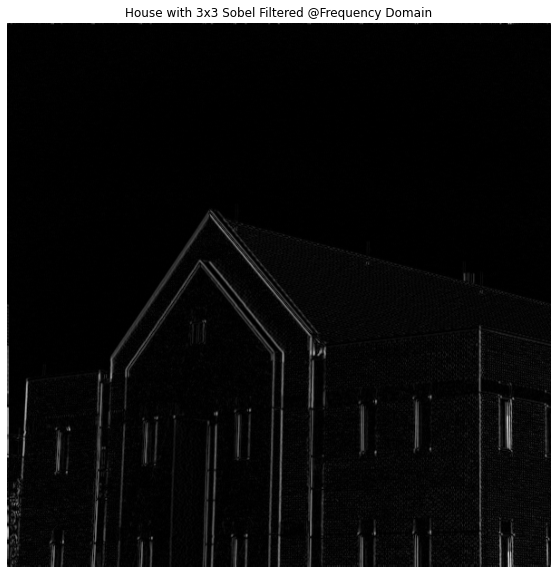

In [8]:
# Compute the Fourier transform of the input image
house_fft = np.fft.fft2(np.float32(house))
dft_shift = np.fft.fftshift(house_fft)

# Create a filter mask in the frequency domain corresponding to the Sobel kernel
sobel_kernel = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
filter_mask = np.fft.fft2(sobel_kernel, s=house.shape)
filter_mask = np.fft.fftshift(filter_mask)

filtered_image_fft_shifted = dft_shift * filter_mask
filtered_image_fft = np.fft.ifftshift(filtered_image_fft_shifted)
filtered_image = np.fft.ifft2(filtered_image_fft)
filtered_image = np.abs(filtered_image)

# Display the filtered image
plt.figure(figsize=(10, 10))
plt.imshow(filtered_image, cmap="gray")
plt.title("House with 3x3 Sobel Filtered @Frequency Domain")
plt.axis("off")
plt.show()

锐化moon

moon原图：

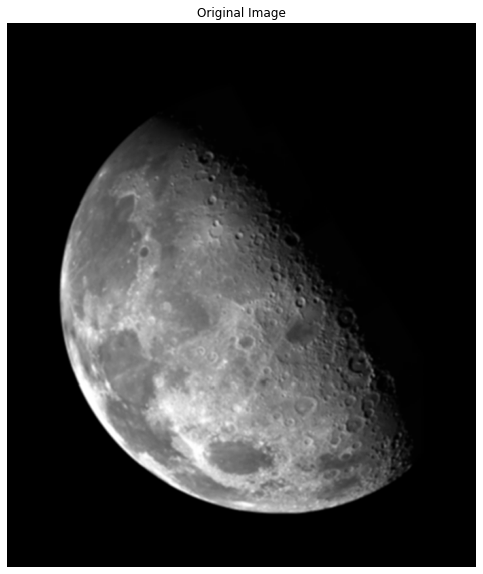

In [9]:
plt.figure(figsize=(10, 10))
plt.imshow(moon, cmap="gray")
plt.title("Original Image")
plt.axis("off")
plt.show()

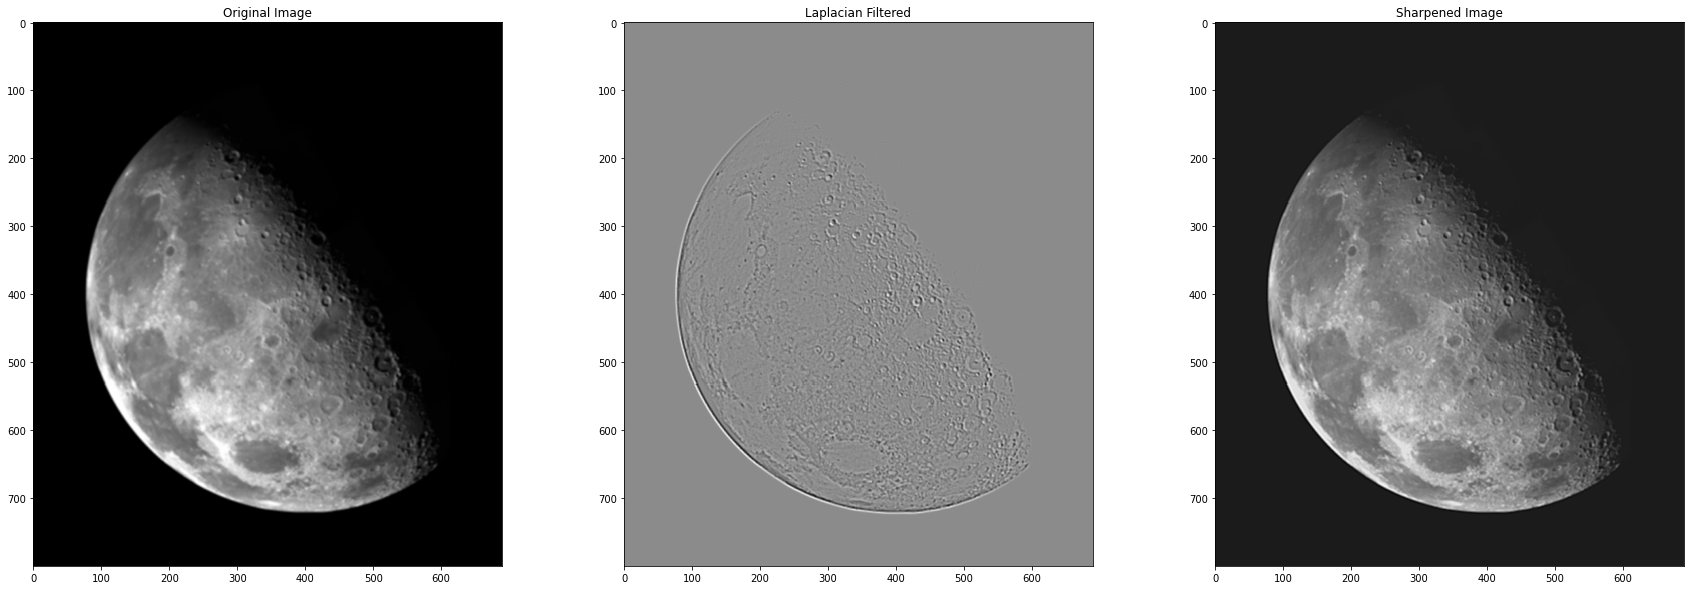

In [10]:
moon_cv2Lap = cv2.Laplacian(moon, cv2.CV_32F, scale=.3, ksize=3)
moon_filtered = moon - moon_cv2Lap

plt.figure(figsize=(30, 10))
plt.subplot(1, 3, 1)
plt.imshow(moon, cmap="gray")
plt.title("Original Image")
plt.subplot(1, 3, 2)
plt.imshow(moon_cv2Lap, cmap="gray")
plt.title("Laplacian Filtered")
plt.subplot(1, 3, 3)
plt.imshow(moon_filtered, cmap="gray")
plt.title("Sharpened Image")
plt.show()